## IMPORTING REQUIRED LIBRARY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## LOADING DATASET

In [5]:
# Loading the 2 datasets into pandas dataframe

transc_data = pd.read_excel('C:/Users/user/OneDrive/Data Analysis/Quantium Chips Category  Data analytics Project/Python/QVI_transaction_data.xlsx')
cust_data = pd.read_csv('C:/Users/user/OneDrive/Data Analysis/Quantium Chips Category  Data analytics Project/Python/QVI_purchase_behaviour.csv')

## DATA WRANGLING

#### TRANSACTION DATASET

Note the transc_data columns:  `DATE`, `STORE_NBR`, `LYLTY_CARD_NBR`, `TXN_ID`, `PROD_NBR`, `PROD_NAME`, `PROD_QTY`, `TOT_SALES`

In [9]:
transc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [10]:
transc_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Change the datatype for `DATE` from an integer to a datetime format

In [12]:
# changing the 'date' column to a datetime type 
transc_data['DATE'] = pd.to_datetime(transc_data['DATE'], unit = 'D', origin = '1900-01-01')


In [13]:
# Removing whitespaces
#transc_data['PROD_NAME'] = transc_data['PROD_NAME'].str.strip()

 Checking duplicates

In [15]:
# Checking for duplicates:
'''
transc_data_dupl = {}

# loop through each column to check for duplicates
for column in transc_data.columns:
    if transc_data[column].duplicated().any():
        # Store duplicate values
        transc_data_dupl[column] = transc_data[column][transc_data[column].duplicated()]

# Print columns with duplicate values
for column, values in transc_data_dupl.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")

''' 

# Checks to see if there are any duplicates in the dataset
print(transc_data.duplicated().any())

# Checks for duplicates in the `LYLTY_CARD_NBR` column
print(transc_data['LYLTY_CARD_NBR'].duplicated().any())

True
True


#### Create a new feature `PACK SIZE` from the product name.

In [17]:
# Creating a new column 'PACK SIZE' and getting it's values by extracting the size of the products included in the product name.

import re
transc_data['PACK_SIZE'] = transc_data['PROD_NAME'].str.extract(r'(\d+g)', flags = re.IGNORECASE)

In [18]:
transc_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


#### Remove the string 'g' and 'G' from the `PACK SIZE` and rename it as `PACK SIZE(g)`

In [20]:
# Let us remove the string 'g' from the 'PACK SIZE' column and rename it to be 'PACK SIZE(g)'

# Remove the 'g' and convert to numeric
transc_data['PACK_SIZE'] = transc_data['PACK_SIZE'].str.replace('g', '')

# Remove the string 'G' from the 'PACK SIZE' column

transc_data['PACK_SIZE'] = transc_data['PACK_SIZE'].str.replace('G', '')

In [21]:
# Rename 'PACK_SIZE' to 'PACK_SIZE(g)'
transc_data.rename(columns={'PACK_SIZE':'PACK_SIZE(g)'}, inplace = True)

In [22]:
# Converting the type for 'PACK SIZE' from str(object) to int.
transc_data['PACK_SIZE(g)'] = transc_data['PACK_SIZE(g)'].astype(int)

In [23]:
transc_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g)
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170


### Create a new column `BRAND_NAME`
This will be done by splitting the first words in the product names.
Use the method `.split` to accomplish this.

In [25]:
# Creating the a new column 'BRAND_NAME' from the 'PROD_NAME' column by splitting the first words in the product names
# use the '.split()' method

transc_data['BRAND_NAME'] = transc_data['PROD_NAME'].str.split().str[0]

In [26]:
transc_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


#### CUSTOMER DATASET

In [28]:
cust_data.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [29]:
cust_data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [30]:
# Checking for whitespaces:
def check_whitespaces(cust_data):
    for column in cust_data.columns:
        if cust_data[column].dtype == 'object': # checks only string columns
            whitespaces = cust_data[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)
            if whitespaces.any():
                print(f"Column '{column}' has whitespaces in the following rows:")
                print(cust_data[whitespaces])
            else:
                print("There are no whitespaces in this data")

# Run the function:
check_whitespaces(cust_data)

There are no whitespaces in this data
There are no whitespaces in this data


## MERGING THE TWO DATASETS TOGETHER

Use the `LYLTY_CARD_NBR` as the primary key for the merge

In [32]:
# Merge both the transc_data and cust_data together:

merged_data = pd.merge(transc_data, cust_data, on = 'LYLTY_CARD_NBR', how = 'left')

In [33]:
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [34]:
# Sort the merged data by the date
merged_data = merged_data.sort_values(by='DATE')

In [35]:
df = merged_data.reset_index()

In [36]:
df = df.drop('index', axis = 1)

In [37]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110,Infuzions,OLDER FAMILIES,Budget
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,Kettle,RETIREES,Premium
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-07-02,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs,OLDER FAMILIES,Budget
264832,2019-07-02,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,165,Tyrrells,YOUNG SINGLES/COUPLES,Mainstream
264833,2019-07-02,212,212068,210874,113,Twisties Chicken270g,2,9.2,270,Twisties,OLDER FAMILIES,Premium
264834,2019-07-02,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110,Cobs,OLDER SINGLES/COUPLES,Premium


## DATA ANALYSIS AND EXPLORATION






In [39]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream


### Checking the distribution of the Categorical Variables in the dataset

In [41]:
for col in df.select_dtypes(include=['object', 'category']):   # This filters the columns in the DataFrame to include only those with object or categorical data types.
    print(f"Value counts for column '{col}':\n")
    print(df[col].value_counts())  # displays the counts of the unique values of each column
    print("\n" + "-"*50 + "\n")


Value counts for column 'PROD_NAME':

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

--------------------------------------------------

Value counts for column 'BRAND_NAME':

BRAND_NAME
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain      

### Noticed that some brand names were duplicated with shorter but similar name.

#### Potential Repetitions: 

* GrnWves and Grain: Could be referring to the same brand "Grain Waves".
* Infuzions and Infzns: Likely repetitions with a shortened name.
* WW and Woolworths: Likely the same brand abbreviated.
* Doritos and Dorito: Likely the same brand with singular/plural variation.
* Smiths and Smith: Likely the same brand with a naming variation.
* Snbts and Sunbites: Likely the same product with abbreviation.
  
#### The code below will fix the duplicated brand names by replacing the duplicate with a matching name


In [43]:
# Manual mapping dictionary
brand_mapping = {
    'Red': 'RRD',
    'GrnWves': 'Grain',
    'Infzns': 'Infuzions',
    'Dorito': 'Doritos',
    'Smith': 'Smiths',
    'NCC' : 'Natural',
    'WW': 'Woolworths',
    'Snbts': 'Sunbites'
}

# Replace values in 'BRAND_NAME' column using the mapping
df['BRAND_NAME'] = df['BRAND_NAME'].replace(brand_mapping)

# Print updated DataFrame
df['BRAND_NAME'].unique()


array(['Pringles', 'Grain', 'Infuzions', 'Kettle', 'RRD', 'Natural',
       'Woolworths', 'Doritos', 'Smiths', 'Old', 'Tostitos', 'Thins',
       'CCs', 'Cobs', 'French', 'Twisties', 'Tyrrells', 'Cheezels',
       'Sunbites', 'Burger', 'Cheetos'], dtype=object)

#### A bar chart showing the Frequency Distribution of BRAND_NAME

[]

<Figure size 640x480 with 0 Axes>

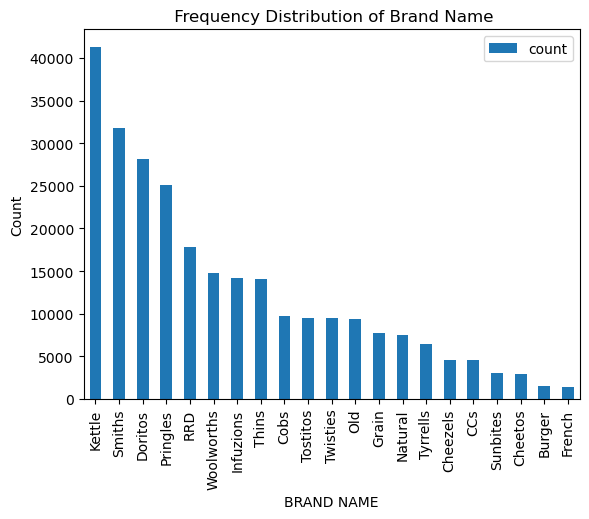

In [45]:
brand_bar = df.groupby('BRAND_NAME')['BRAND_NAME'].count()
brand_bar = pd.DataFrame(brand_bar)
brand_bar.rename(columns={'BRAND_NAME': 'count'}, inplace = True)
brand_bar = brand_bar.sort_values(by = 'count', ascending = False)

plt.figure()
brand_bar.plot(kind = 'bar')
plt.xlabel('BRAND NAME')
plt.ylabel('Count')
plt.title(' Frequency Distribution of Brand Name')
plt.plot() 

### Reprinting the value counts of the categorical variables after the changes made

In [47]:
for col in df.select_dtypes(include=['object', 'category']):   # This filters the columns in the DataFrame to include only those with object or categorical data types.
    print(f"Value counts for column '{col}':\n")
    print(df[col].value_counts())  # displays the counts of the unique values of each column
    print("\n" + "-"*50 + "\n")


Value counts for column 'PROD_NAME':

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

--------------------------------------------------

Value counts for column 'BRAND_NAME':

BRAND_NAME
Kettle        41288
Smiths        31823
Doritos       28147
Pringles      25102
RRD           17779
Woolworths    14757
Infuzions     14201
Thins         14075
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Grain          7740
Natural    

### INSIGHT ON THE DATA DISTRIBUTION OF THE CATEGORICAL VARIABLES

* `BRAND_NAME` :  The top brands by frequency are `Kettle`, `Smiths`, and `Doritos` which indicates dominance in the dataset. While the least popular brands with low counts are `French`, `Burger`, and `Cheetos` indicating how less common they are.
  * Market Analysis: It could suggest market dominance or customer preference for certain products.
  * For modelling: The distribution is right-skewed, with a few brands dominating the dataset and many brands having much lower representation. This will lead to bias if not properly handled.
  * I recommend focusing campaigns on the top-performing brands while exploring reasons for low popularity among others. Also ensure that high-demand brands like `Kettle` are adequently stocked.

* `LIFESTAGE` : The distrubution for lifestage indicates the customers with the most dominance in the dataset are `Older Singles/Couples`, `Retirees`, and `Older Families`. 
   * Products should align with these high-frequency customer segments. Finding the correlationg between customer segments and product preferences will be a logical step forward.
   * The distribution of the  dataset is left-skewed as the data is concentrated among higher values ( `Older groups`), with fewer occurrences like `New Families`


* `PREMIUM_CUSTOMER` : `Mainstream` and `Budget` customers drive the mamority of sales, as they make up the largest portion of the dataset. Prioritizing marketing strategies for these segments would be ideal.
    * The distribution leans left but not in an extreme way, meaning it isn't heavily skewed. Since this variable is not highly imbalances the model should not be overly biased toward one class, which reduces the need for data balancing techniques.

###  Checking the distribution of the Numerical Variables in the dataset
Using boxplots and histogram

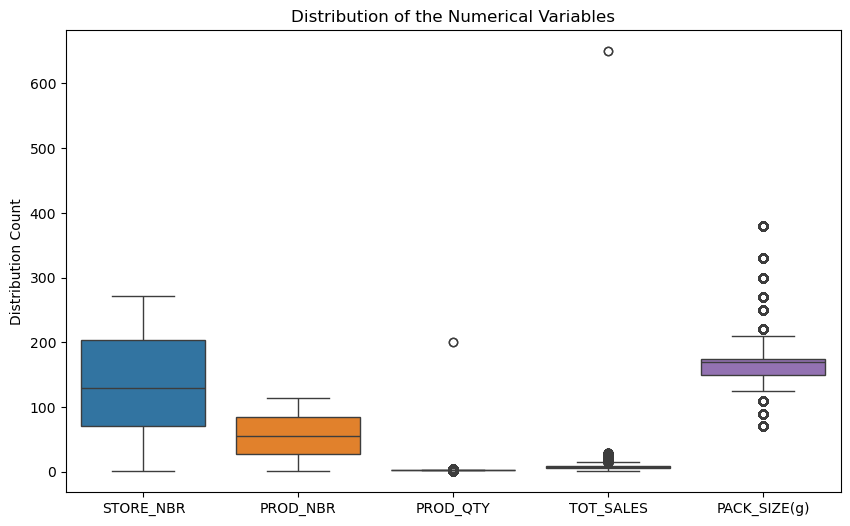

In [50]:
plt.figure(figsize = (10, 6))
df_BOX = df[['STORE_NBR',
             'PROD_NBR', 'PROD_QTY', 'TOT_SALES',
             'PACK_SIZE(g)']]
sns.boxplot(df_BOX)
plt.title('Distribution of the Numerical Variables')
plt.ylabel('Distribution Count')
plt.show()

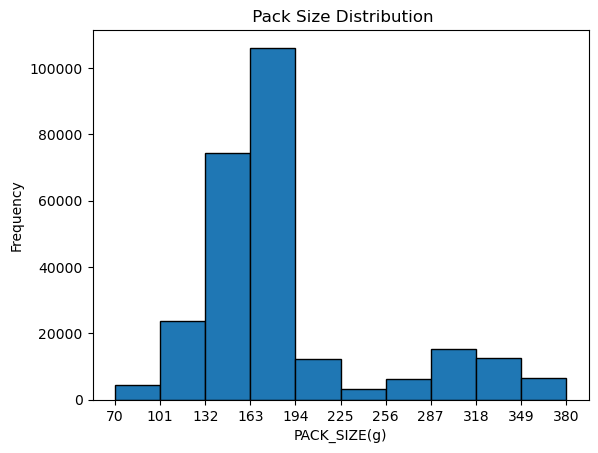

In [51]:
# Frequency distribution of 'standard_cost'[
count, bin_edges = np.histogram(df['PACK_SIZE(g)'])
df['PACK_SIZE(g)'].plot(kind= 'hist', xticks = bin_edges, edgecolor = 'black')

plt.xlabel('PACK_SIZE(g)')
plt.title( ' Pack Size Distribution')

plt.show()

In [52]:
qty_out = df[df['TOT_SALES'] > 1.5 * (df['TOT_SALES'].quantile(0.75) - df['TOT_SALES'].quantile(0.25)) + df['TOT_SALES'].quantile(0.75)]
qty_out

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
13235,2018-07-21,105,105127,106050,23,Cheezels Cheese 330g,3,17.10,330,Cheezels,RETIREES,Mainstream
32069,2018-08-16,205,205334,204402,14,Smiths Crnkle Chip Orgnl Big Bag 380g,3,17.70,380,Smiths,OLDER FAMILIES,Mainstream
32085,2018-08-16,63,63094,59958,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,5,23.00,150,Kettle,OLDER SINGLES/COUPLES,Mainstream
32109,2018-08-16,257,257208,257019,45,Smiths Thinly Cut Roast Chicken 175g,5,15.00,175,Smiths,OLDER FAMILIES,Premium
32116,2018-08-16,130,130180,134407,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.00,110,Infuzions,RETIREES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
234962,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00,380,Doritos,OLDER FAMILIES,Premium
234966,2019-05-22,39,39005,34628,4,Dorito Corn Chp Supreme 380g,5,16.25,380,Doritos,OLDER SINGLES/COUPLES,Mainstream
235005,2019-05-22,21,21351,18079,16,Smiths Crinkle Chips Salt & Vinegar 330g,3,17.10,330,Smiths,OLDER SINGLES/COUPLES,Mainstream
235010,2019-05-22,155,155054,155349,88,Kettle Honey Soy Chicken 175g,5,27.00,175,Kettle,OLDER FAMILIES,Budget


In [53]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,Grain,OLDER FAMILIES,Mainstream


### Total Sales:

In [55]:
print('Total sales is :', df['TOT_SALES'].sum())

Total sales is : 1934414.9999999998


## Customers that drove more sales:

In [57]:
df_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

In [58]:
df_sales = pd.DataFrame(df_sales).reset_index()
df_sales

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,507458.95


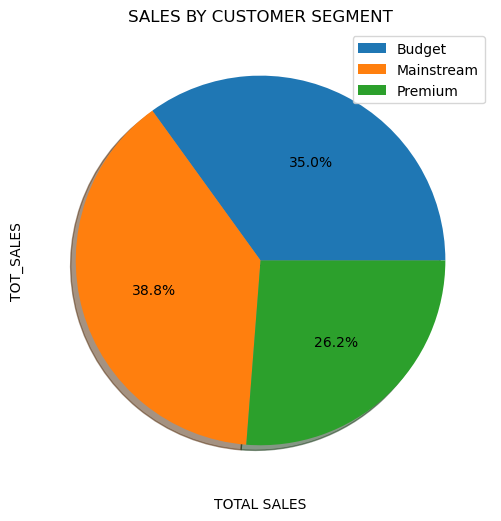

In [59]:
plt.figure(figsize = (12,6))
df_sales['TOT_SALES'].plot(kind = 'pie', labels = None, shadow = True,
                          autopct = '%1.1f%%')

plt.title('SALES BY CUSTOMER SEGMENT')
plt.xlabel('TOTAL SALES')
plt.legend(labels=df_sales['PREMIUM_CUSTOMER'], loc= 'upper right')
plt.show()

The above pie chart displays that the most sales came from the Mainstream and Budget customers. Although, this cannot be a driving factor due to the fact there isn't an overwhelming sales difference between the three customer segments, it still shows that the Mainstream and Budget customers have brought in more sales than the Premium customers.
Diving deeper into the customers interactions with the products will be necessary to get more insights.

In [61]:
sales_trend = df.groupby('DATE')['TOT_SALES'].sum()
sales_trend = pd.DataFrame(sales_trend).reset_index()

sales_trend

,DATE,TOT_SALES
0,2018-07-03,5372.2
1,2018-07-04,5315.4
2,2018-07-05,5321.8
3,2018-07-06,5309.9
4,2018-07-07,5080.9
...,...,...
359,2019-06-28,5305.0
360,2019-06-29,5202.8
361,2019-06-30,5299.6
362,2019-07-01,5497.6


### Sales Trend Within a Year (July 2018 to July 2019)

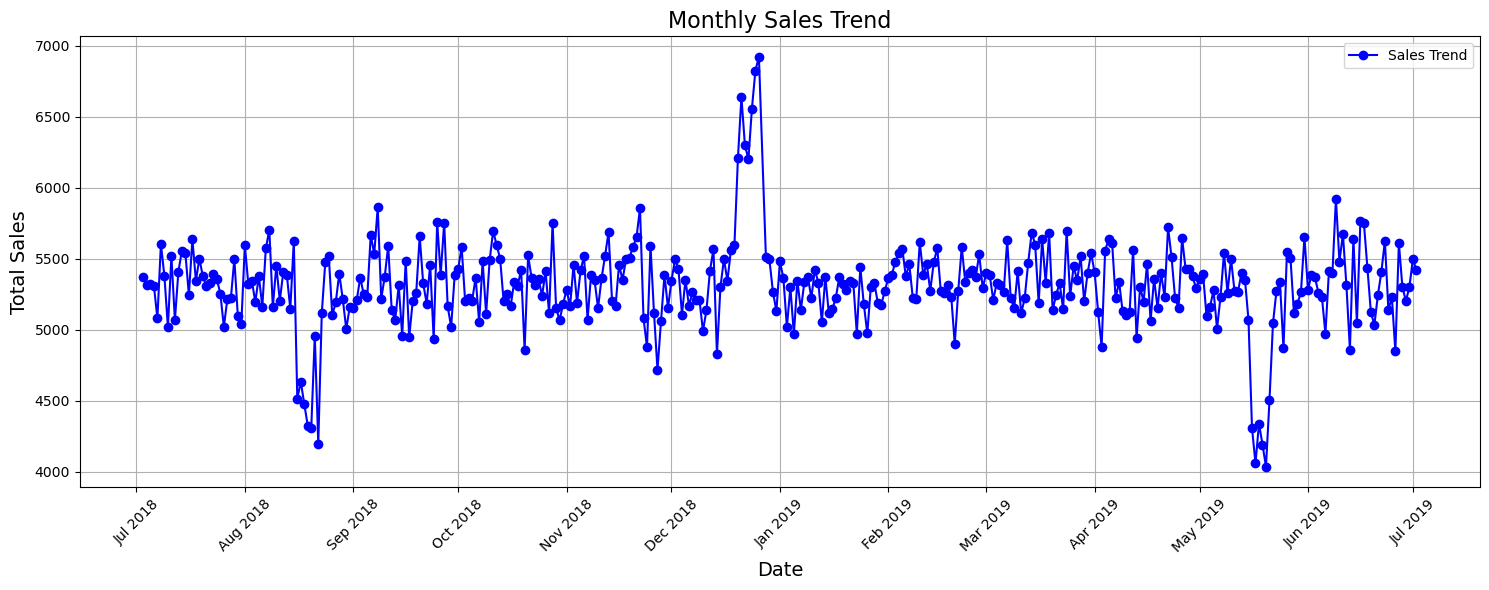

In [63]:
import matplotlib.dates as mdates

# Assuming 'sales_trend' is a DataFrame and 'DATE' is already converted to datetime
plt.figure(figsize=(15, 6))

# Set date formatter and locator for better granularity
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format dates as Month-Year
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Plot the data
plt.plot(sales_trend['DATE'], sales_trend['TOT_SALES'], marker='o',
         linestyle='-', color='blue', label='Sales Trend')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


The obsevered line chart above, displays trend for the Sales of chips from July 2018 to July 2019. It is noted that majority of the total sales were within the range of `$5000` to `$6000`. 
Although, there was a drastic drop in sales sometime within August 2018 and May 2019. The drop was well below `4500`. This will be further investigated to find out why sales were so low. 
Furthermore, the only time a spike in sales occured was in December 2018. A stricking total of almost `$7000`. Further investigation would be conducted on this to understand the situation in detail.

#### Observe more closesly, the exact day at which sales were at the highest.

<Figure size 1000x600 with 0 Axes>

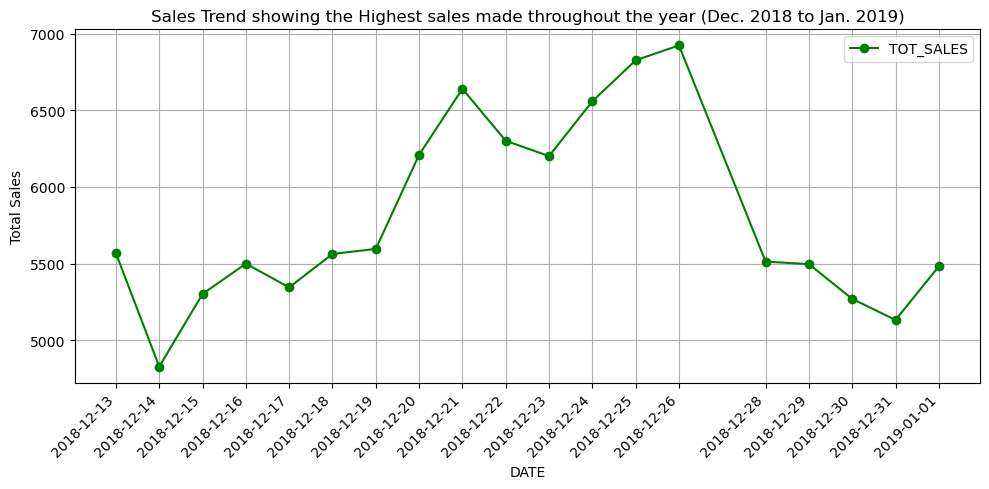

In [66]:
H_salestrend = sales_trend[
    (sales_trend['DATE'] >= '2018-12-13') & (sales_trend['DATE'] <= '2019-01-01')
]

plt.figure(figsize=(10,6))
H_salestrend.plot(kind = 'line', x='DATE', y= 'TOT_SALES', figsize =(10,5), color = 'green', marker = 'o')
plt.grid()
plt.xticks(H_salestrend['DATE'], rotation=45) 
plt.title('Sales Trend showing the Highest sales made throughout the year (Dec. 2018 to Jan. 2019)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

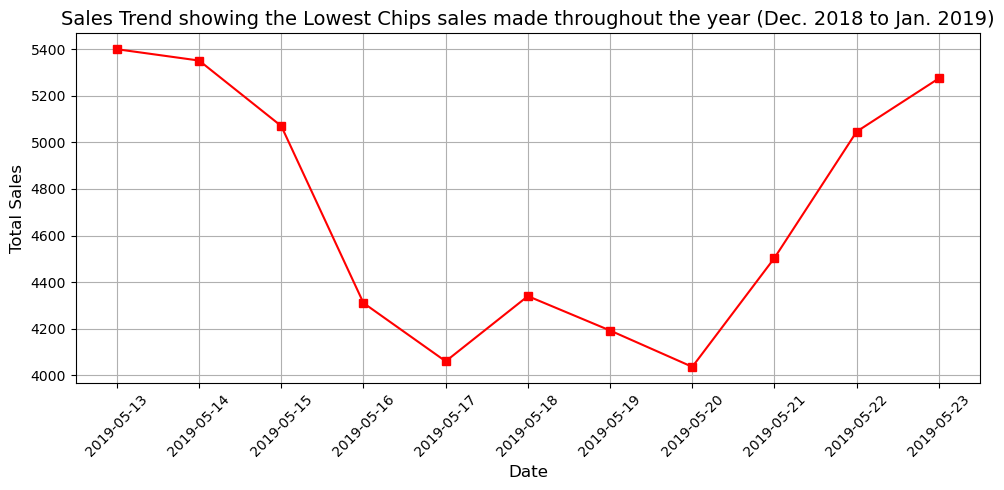

In [68]:
# Filtered data
L_salestrend = sales_trend[
    (sales_trend['DATE'] >= '2019-05-13') & (sales_trend['DATE'] <= '2019-05-23')
]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(L_salestrend['DATE'], L_salestrend['TOT_SALES'], marker='s', linestyle='-', color='red')

# Customize x-axis ticks
plt.xticks(
    ticks=L_salestrend['DATE'], 
    labels=L_salestrend['DATE'].dt.strftime('%Y-%m-%d'),  # Format dates as strings
    rotation=45
)

# Add title and labels
plt.title('Sales Trend showing the Lowest Chips sales made throughout the year (Dec. 2018 to Jan. 2019)', fontsize=14)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [69]:
trend_count = df.groupby('DATE')['TOT_SALES'].count()
trend_count = pd.DataFrame(trend_count).reset_index()

trend_count

,DATE,TOT_SALES
0,2018-07-03,724
1,2018-07-04,711
2,2018-07-05,722
3,2018-07-06,714
4,2018-07-07,712
...,...,...
359,2019-06-28,723
360,2019-06-29,709
361,2019-06-30,730
362,2019-07-01,745


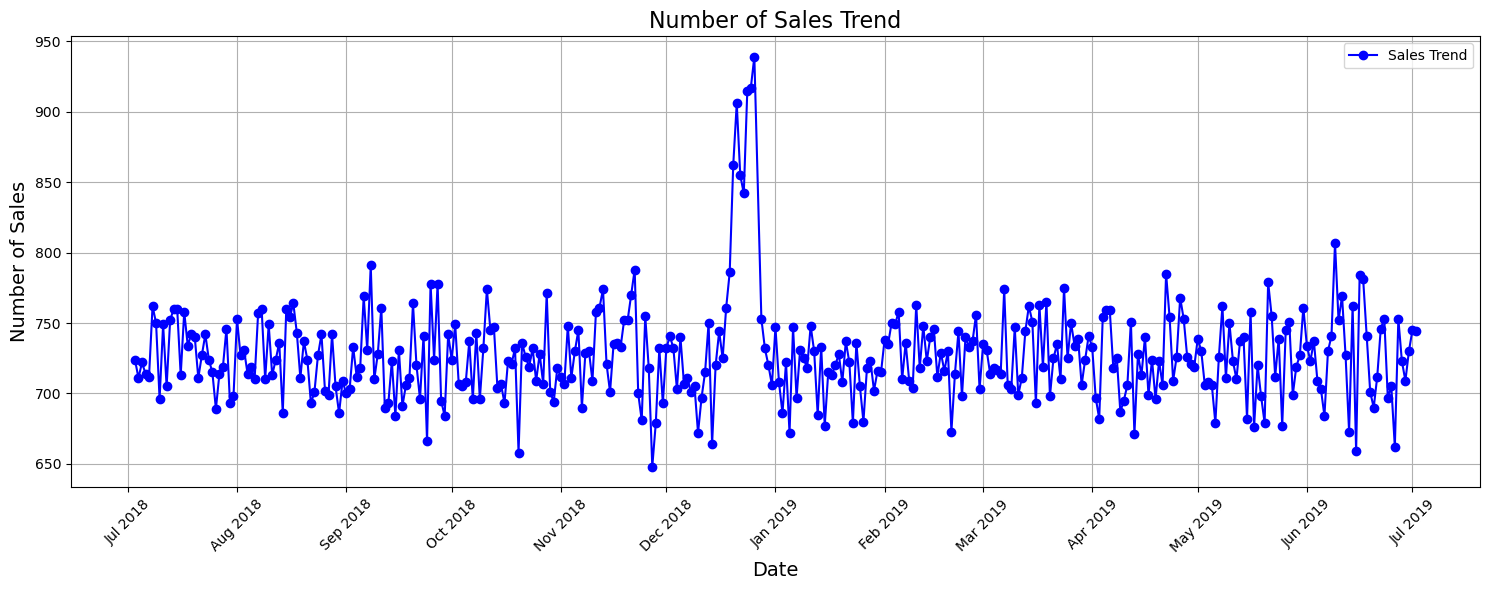

In [70]:
import matplotlib.dates as mdates

# Assuming 'sales_trend' is a DataFrame and 'DATE' is already converted to datetime
plt.figure(figsize=(15, 6))

# Set date formatter and locator for better granularity
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format dates as Month-Year
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Plot the data
plt.plot(trend_count['DATE'], trend_count['TOT_SALES'], marker='o',
         linestyle='-', color='blue', label='Sales Trend')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Number of Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Most Sold Products

In [72]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,Grain,OLDER FAMILIES,Mainstream


In [73]:
most_sold = df.groupby('BRAND_NAME')['PROD_QTY'].sum()
most_sold = pd.DataFrame(most_sold).reset_index()
most_sold = most_sold.sort_values(by = 'PROD_QTY', ascending = False)
most_sold

,BRAND_NAME,PROD_QTY
9,Kettle,79051
14,Smiths,60339
5,Doritos,54216
12,Pringles,48019
13,RRD,33646
20,Woolworths,27856
8,Infuzions,27119
16,Thins,26929
4,Cobs,18571
17,Tostitos,18134


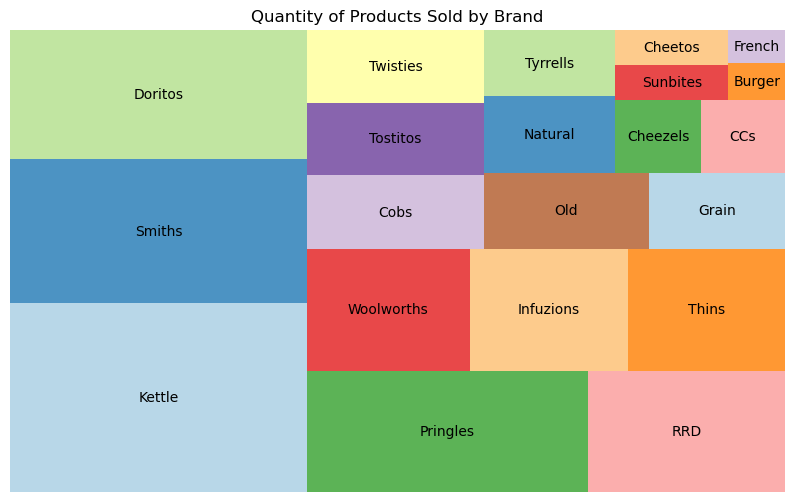

In [74]:
import squarify

# Data preparation
sizes = most_sold['PROD_QTY']
labels = most_sold['BRAND_NAME']

# Plot
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.Paired.colors)
plt.title('Quantity of Products Sold by Brand')
plt.axis('off')  # Remove axes for clarity
plt.show()


#### The treemap above show the Brands by the number of products sold. `Kettle` sold the most out of all the brands

### LifeStage Engagement with Brand
It will show the popularity of `BRAND_NAME` with the `LIFESTAGE`

In [77]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,Grain,OLDER FAMILIES,Mainstream


In [78]:
df_LS = df[['LIFESTAGE', 'BRAND_NAME', 'TOT_SALES']]
df_LS = df.groupby(['LIFESTAGE', 'BRAND_NAME'], as_index = False)['TOT_SALES'].count()
df_LS

,LIFESTAGE,BRAND_NAME,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Burger,152
1,MIDAGE SINGLES/COUPLES,CCs,433
2,MIDAGE SINGLES/COUPLES,Cheetos,265
3,MIDAGE SINGLES/COUPLES,Cheezels,443
4,MIDAGE SINGLES/COUPLES,Cobs,961
...,...,...,...
142,YOUNG SINGLES/COUPLES,Thins,1959
143,YOUNG SINGLES/COUPLES,Tostitos,1368
144,YOUNG SINGLES/COUPLES,Twisties,1395
145,YOUNG SINGLES/COUPLES,Tyrrells,955


Pivoting the dataframe 

In [80]:
pivot_LS = df_LS.pivot(index = 'LIFESTAGE', columns = 'BRAND_NAME', values = 'TOT_SALES')
pivot_LS

BRAND_NAME,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,Infuzions,Kettle,...,Old,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LIFESTAGE,,,,,,,,,,,,,,,,,,,,,
MIDAGE SINGLES/COUPLES,152,433,265,443,961,2661,117,732,1403,4055,...,915,2389,1614,2956,249,1316,924,931,611,1289
NEW FAMILIES,40,93,62,129,288,784,32,213,393,1171,...,245,698,388,759,61,378,277,233,187,330
OLDER FAMILIES,353,941,615,813,1624,4867,283,1429,2496,6851,...,1589,4244,3895,6443,622,2475,1546,1644,1093,3202
OLDER SINGLES/COUPLES,292,851,580,966,2036,5920,286,1603,2962,8847,...,1945,5307,3324,6320,584,2969,2039,1949,1340,2893
RETIREES,256,741,491,867,1884,5471,228,1466,2719,8194,...,1839,4951,2980,5613,535,2792,1850,1890,1259,2451
YOUNG FAMILIES,293,898,550,771,1504,4434,278,1221,2215,6277,...,1467,3829,3396,5673,596,2186,1467,1412,997,2761
YOUNG SINGLES/COUPLES,178,594,364,614,1396,4010,194,1076,2013,5893,...,1324,3684,2182,4059,361,1959,1368,1395,955,1831


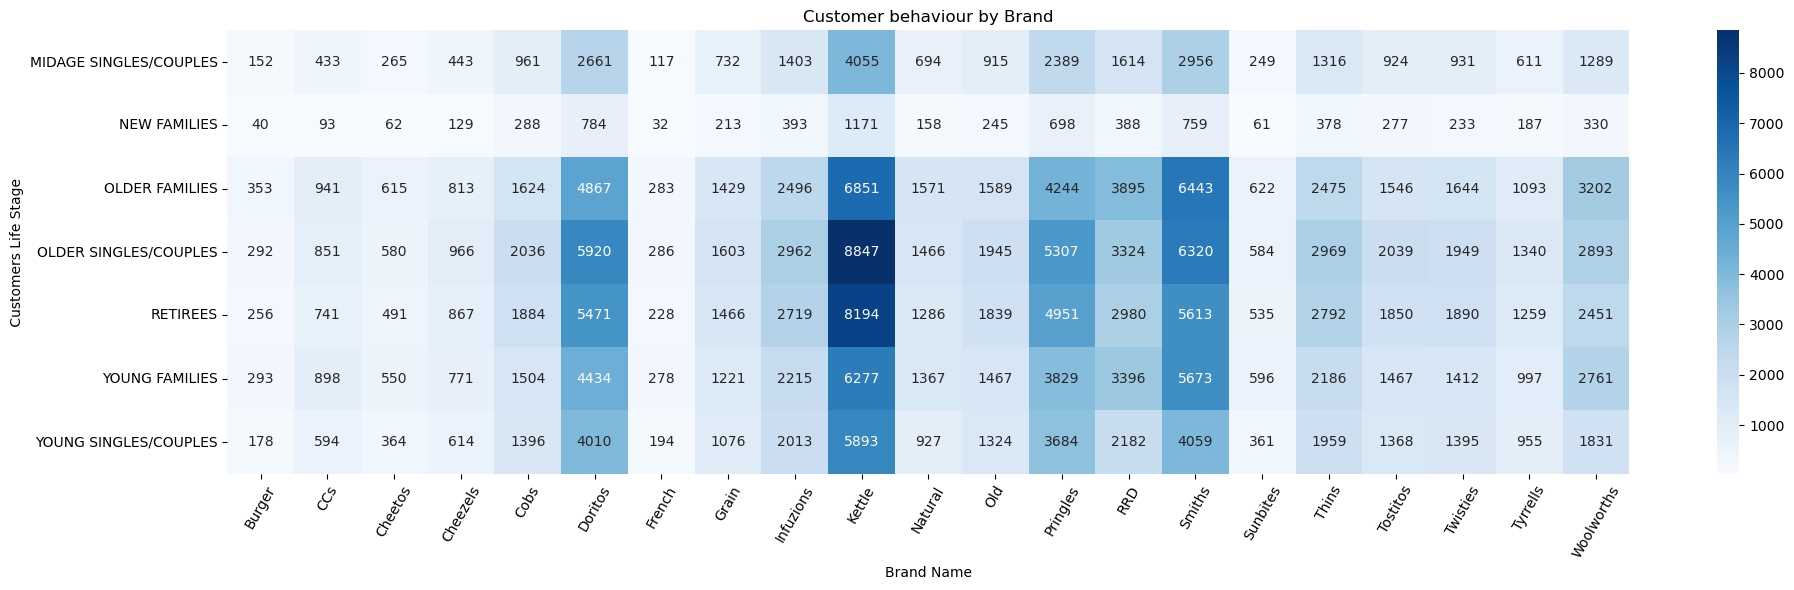

In [81]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.heatmap(pivot_LS, annot=True, fmt=".0f", cmap='Blues')
plt.title('Customer behaviour by Brand')
plt.ylabel(" Customers Life Stage ")
plt.xlabel('Brand Name')
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()


#### The heat map above displays Customer behaviour by Brand. From this, we can tell that Kettle, Smiths, Doritos, and Pringles type of chips are respectively the 4 most sold brands with a target audience of Older Singles/Couples, Retirees, Older Families, Young Families, and Young Singles/Couples.


### Effects of the Pack size on Sales and Customer behavior 

In [84]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,Grain,OLDER FAMILIES,Mainstream


In [85]:
df_ps = df.groupby(['PACK_SIZE(g)', 'BRAND_NAME'])['PROD_QTY'].sum()
df_ps = pd.DataFrame(df_ps).reset_index()
df_ps

,PACK_SIZE(g),BRAND_NAME,PROD_QTY
0,70,Infuzions,2855
1,90,Sunbites,5692
2,110,Cobs,18571
3,110,Infuzions,24264
4,125,Cheezels,2730
5,134,Pringles,48019
6,135,Kettle,6212
7,150,Doritos,12211
8,150,Kettle,36414
9,150,RRD,19622


In [86]:
#pivot_ps = df_ps.pivot(index = 'PACK_SIZE(g)', columns = 'BRAND_NAME', values = 'TOT_SALES')
#pivot_ps

pivot_ps = df_ps.pivot_table(values='PROD_QTY', index='PACK_SIZE(g)', columns='BRAND_NAME', aggfunc='sum', fill_value=0)
pivot_ps

BRAND_NAME,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,Infuzions,Kettle,...,Old,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
PACK_SIZE(g),,,,,,,,,,,,,,,,,,,,,
70,0,0,0,0,0,0,0,0,2855,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5692,0,0,0,0,0
110,0,0,0,0,18571,0,0,0,24264,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,2730,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,48019,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,6212,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,12211,0,0,0,36414,...,0,0,19622,13927,0,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5604
165,0,0,2729,0,0,0,0,0,0,0,...,0,0,14024,0,0,0,0,0,12298,0


<Figure size 1000x600 with 0 Axes>

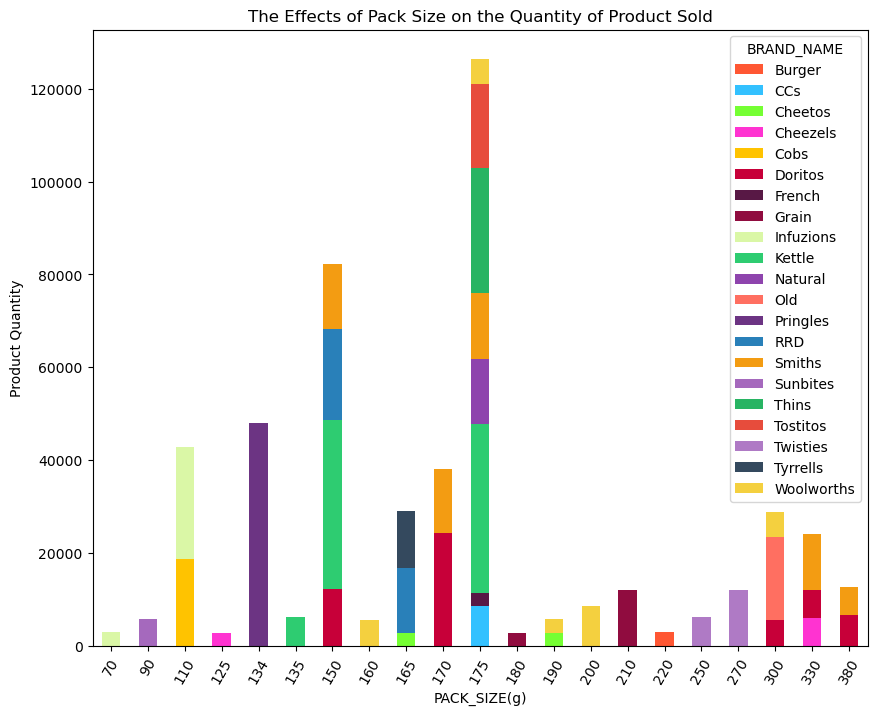

In [87]:
plt.figure(figsize = (10, 6))

colors = ['#FF5733', '#33C1FF', '#75FF33', '#FF33D1', '#FFC300', '#C70039',
          '#581845', '#900C3F', '#DAF7A6', '#2ECC71', '#8E44AD', '#FF6F61',
          '#6C3483', '#2980B9', '#F39C12', '#A569BD', '#28B463', '#E74C3C',
          '#AF7AC5', '#34495E', '#F4D03F']
pivot_ps.plot(kind='bar', stacked=True, figsize=(10, 8), color= colors)
plt.title('The Effects of Pack Size on the Quantity of Product Sold')
plt.ylabel('Product Quantity')
plt.xticks(rotation = 60)
plt.show()

### Individual Stores Sales progress 

In [89]:
df_store = df.groupby('STORE_NBR')['TOT_SALES'].sum()
df_store = pd.DataFrame(df_store).reset_index()
df_store

,STORE_NBR,TOT_SALES
0,1,2393.60
1,2,2005.80
2,3,12802.45
3,4,14647.65
4,5,9500.80
...,...,...
267,268,2601.05
268,269,11221.80
269,270,11293.95
270,271,9721.80


In [90]:
df['STORE_NBR'].unique()

array([ 19, 189, 124,  70,  33,  18, 172,  39,  23, 238, 165, 102,  37,
         8, 236, 130,  24, 184, 191,  32,  91, 144,  40, 235, 196, 112,
        46,  17,  13,  84,  45, 137, 178, 199,  30, 123,   5,  20, 174,
        21, 242, 190, 195, 257, 255,  77, 231, 176, 179, 247, 125, 128,
        63, 260, 109,  79, 186, 270,  69, 183,  80,   4, 215,  43, 237,
        68, 205, 126, 164,  67,  75,  93, 251,   7, 154, 232, 173, 210,
        88, 148, 156, 104, 207,   1, 166, 143, 200, 108, 226, 147,  65,
        56,  57, 181, 216, 209, 213, 223,  73,  78, 113, 118,  36,  10,
       203,  12, 101,   3, 175, 220, 230, 221,  61, 171, 169,  83,  59,
       229, 116, 155,   9, 219, 225,  64,  86, 133, 268,  58, 114, 111,
       271, 272, 201,  28, 122, 261,  98, 259, 240, 168, 208,  94, 262,
        51,  60, 139, 180, 265, 269, 149,  71, 197, 264,  27, 222,  55,
       256, 138,  25, 194, 152,  81, 217, 103, 119, 167, 110, 107, 182,
        29, 115, 131,  35, 212, 157,  15, 160,  47, 153,  66, 22

In [91]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,Grain,OLDER FAMILIES,Mainstream


## PROPORTION OF SALES

In [93]:
pl = df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum()
pl = pd.DataFrame(pl)
pl

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
                 OLDER FAMILIES          168363.25
                 OLDER SINGLES/COUPLES   136769.80
                 RETIREES                113147.80
                 YOUNG FAMILIES          139345.85
                 YOUNG SINGLES/COUPLES    61141.60
Mainstream       MIDAGE SINGLES/COUPLES   90803.85
                 NEW FAMILIES             17013.90
                 OLDER FAMILIES          103445.55
                 OLDER SINGLES/COUPLES   133393.80
                 RETIREES                155677.05
                 YOUNG FAMILIES           92788.75
                 YOUNG SINGLES/COUPLES   157621.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 NEW FAMILIES             11491.10
                 OLDER FAMILIES           81958.40
                 OLDER SINGLES/COUPLES   132263.15
                 RETIREES                 97646.05
                 YOUNG FAMILIES           84025.50
                 YOUNG SINGLES/COUPLES    41642.10

In [94]:
pl_pivot = pl.pivot_table(values='TOT_SALES', index='LIFESTAGE', columns='PREMIUM_CUSTOMER')
pl_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,35514.80,90803.85,58432.65
NEW FAMILIES,21928.45,17013.90,11491.10
OLDER FAMILIES,168363.25,103445.55,81958.40
OLDER SINGLES/COUPLES,136769.80,133393.80,132263.15
RETIREES,113147.80,155677.05,97646.05
YOUNG FAMILIES,139345.85,92788.75,84025.50
YOUNG SINGLES/COUPLES,61141.60,157621.60,41642.10


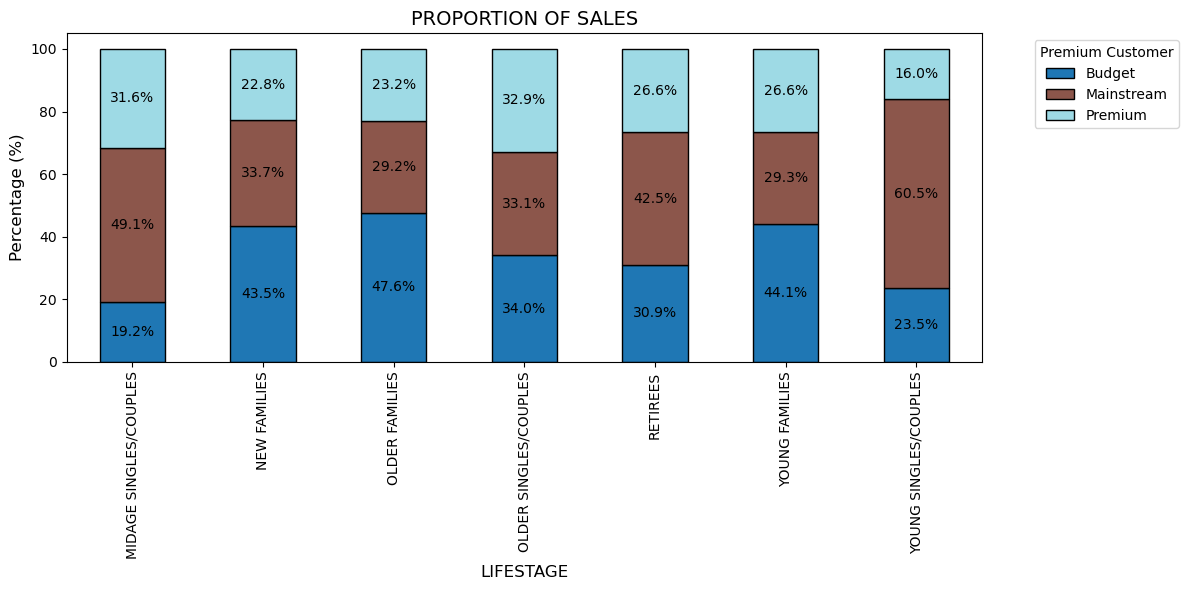

In [95]:
# calculate the percentages
percentages = pl_pivot.div(pl_pivot.sum(axis=1), axis=0) * 100   # The .div() method normalizes sales values within each LIFESTAGE to sum to 100%.
                                                                 # by dividing each cell in a row by the row total, normalizing the data to percentages.
                                # .sum(axis=1) calculates the total sales across all premium_customer categories for each lifestage.

# Plot the stacked bar chart with percentages
ax = percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', edgecolor='black')


# Annotate Percentages on the Bars Or Add percentages to the bars
# Iterates over ax.patches to annotate bars with their respective percentage values.

for bar in ax.patches: # ax.patches contains all the bar obejects (rectangles) in the chart.
    width, height = bar.get_width(), bar.get_height()  # Get the width and height of each bar.
    x, y = bar.get_xy()  # Get the bottom-left coordinates of the bar.
    if height > 0:  # Only label non-zero bars
        # Add a text label to the center of the bar:
        ax.text(x + width / 2, y + height / 2,
                f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Customize the chart
plt.title('PROPORTION OF SALES', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Sales are mainly coming from Budget - Older families, Mainstream - Young singles/couples, & Mainstream - Midage Singles/Couples



## PROPORTION OF CUSTOMER


In [98]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,Grain,OLDER FAMILIES,Mainstream


In [99]:
cust_seg = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count()
cust_seg = pd.DataFrame(cust_seg)
cust_seg

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      5020
                       Mainstream                 11874
                       Premium                     8216
NEW FAMILIES           Budget                      3005
                       Mainstream                  2325
                       Premium                     1589
OLDER FAMILIES         Budget                     23160
                       Mainstream                 14244
                       Premium                    11192
OLDER SINGLES/COUPLES  Budget                     18407
                       Mainstream                 18318
                       Premium                    17754
RETIREES               Budget                     15201
                       Mainstream                 21466
                       Premium                    13096
YOUNG FAMILIES         Budget                     19122
                       Mainstream                 12907
                       Premium                    11563
YOUNG SINGLES/COUPLES  Budget                      9242
                       Mainstream                 20854
                       Premium                     6281

In [100]:
pivot_custseg = cust_seg.pivot_table(values='LYLTY_CARD_NBR', index='LIFESTAGE', columns='PREMIUM_CUSTOMER')
pivot_custseg

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,5020.0,11874.0,8216.0
NEW FAMILIES,3005.0,2325.0,1589.0
OLDER FAMILIES,23160.0,14244.0,11192.0
OLDER SINGLES/COUPLES,18407.0,18318.0,17754.0
RETIREES,15201.0,21466.0,13096.0
YOUNG FAMILIES,19122.0,12907.0,11563.0
YOUNG SINGLES/COUPLES,9242.0,20854.0,6281.0


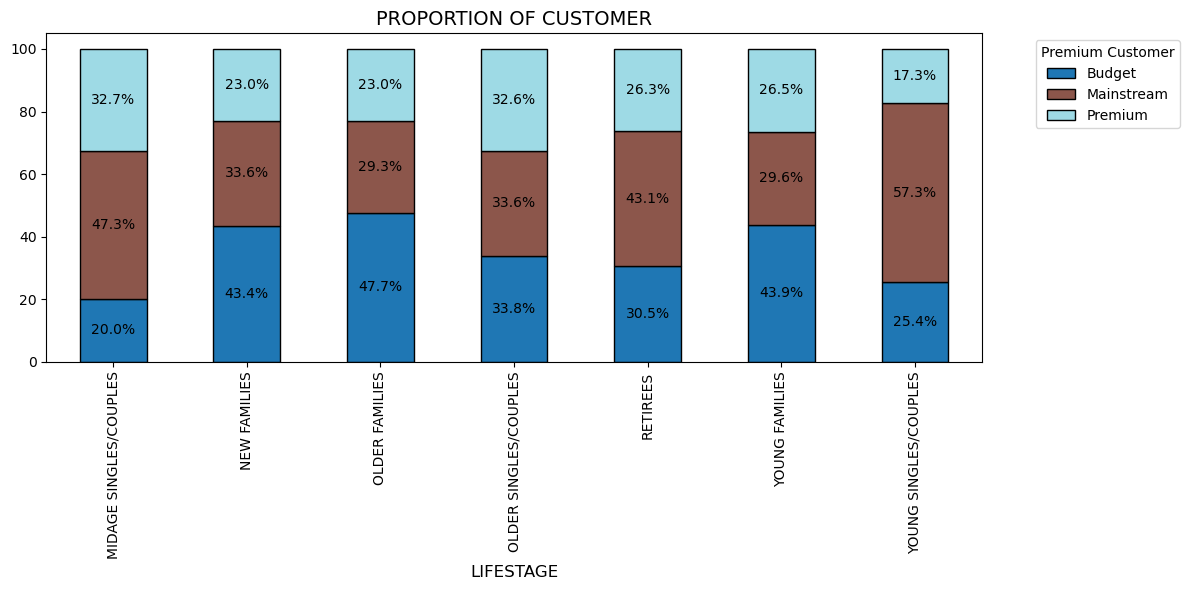

In [101]:
# calculate the percentages
perc = pivot_custseg.div(pivot_custseg.sum(axis=1), axis=0) * 100   # The .div() method normalizes sales values within each LIFESTAGE to sum to 100%.


# Plot the stacked bar chart with percentages
ax = perc.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', edgecolor='black')

# Add percentages to the bars
# Iterates over ax.patches to annotate bars with their respective percentage values.
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    if height > 0:  # Only label non-zero bars
        ax.text(x + width / 2, y + height / 2,
                f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Customize the chart
plt.title('PROPORTION OF CUSTOMER', fontsize=14)
#plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### There are more Mainstream - Young Singles/Couples that buy chips, and  Mainstream - Midage Singles/Couples buy chips

In [103]:
# Group the dataset by LIFESTAGE, PREMIUM_CUSTOMER, and 'lYLTY_CARD_NBR':
unit = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR'])['PROD_QTY'].sum()
unit = pd.DataFrame(unit)
unit

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER LYLTY_CARD_NBR          
MIDAGE SINGLES/COUPLES Budget           1052                   1
                                        1081                   5
                                        1184                   1
                                        1307                   6
                                        1343                   2
...                                                          ...
YOUNG SINGLES/COUPLES  Premium          272236                 4
                                        272319                 4
                                        272358                 1
                                        272379                 4
                                        272380                 2

[72637 rows x 1 columns]

In [104]:
avg_units = unit.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
avg_units.rename(columns={'PROD_QTY': 'AVG_UNITS_PER_CUSTOMER'}, inplace= True)
avg_units = pd.DataFrame(avg_units)


In [105]:
avg_units

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_UNITS_PER_CUSTOMER
0,MIDAGE SINGLES/COUPLES,Budget,6.313830
1,MIDAGE SINGLES/COUPLES,Mainstream,6.796108
2,MIDAGE SINGLES/COUPLES,Premium,6.386672
3,NEW FAMILIES,Budget,5.009892
4,NEW FAMILIES,Mainstream,5.087161
5,NEW FAMILIES,Premium,5.028912
6,OLDER FAMILIES,Budget,9.639572
7,OLDER FAMILIES,Mainstream,9.804309
8,OLDER FAMILIES,Premium,9.749780
9,OLDER SINGLES/COUPLES,Budget,7.145466


In [106]:
avg_units.plot(kind = bar, x = 'LIFESTAGE', y = 'AVG_UNITS_PER_CUSTOMER')

ValueError: Rectangle(xy=(5.75, 82.7336), width=0.5, height=17.2664, angle=0) is not a valid plot kind